#  **MODELO DE REGRESIÓN**

El objetivo de este modelo de regresión es calcular los pesos de cada variable para obtener una fórmula que nos indique cómo se calcula el Score (índice de igualdad de género)

In [ ]:
#Primer paso conectar al drive:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
### importamos librería
!pip install shap

#analisis
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

#librería básica de algoritmos
from sklearn.preprocessing import LabelEncoder,MinMaxScaler 
from sklearn.model_selection import train_test_split, cross_val_score

#modelos
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
import xgboost as xgb

# Preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder,MinMaxScaler 

#metricas
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#1. Importar Datos

-- creo que las rutas son así, lo miramos! --

In [ ]:
#LAIA:
df_final = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/TEAM/Capstone/df_final')

In [ ]:
#VALENTINA:
#df_final = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/CAPSTONE/df_final')

In [ ]:
#LAURA:
#df_final = pd.read_csv('/content/drive/MyDrive/TEAM/Capstone/df_final')

In [ ]:
df_final

,Country,fulltime_employement_rate,duration_working_life,employed_in_education_health_socialactivities,flexibility_at_work,career_prospects,mean_monthly_earnings,mean_equivalised_income,risk_of_poverty,S20/S80_income,...,good_self-perceived_health,life_expectancy,healthy_life_years,no_smoking_nor_harmful_drinking,doing_sport_eating_healthy,no_medical_examination,no_dental_examination,year,Sex,Score
0,Austria,42.0,35.0,28.0,36.0,64.0,2343.0,26442.0,14.0,24.0,...,71.0,84.0,58.0,65.0,51.0,1.0,1.0,2021,W,68.00
1,Belgium,40.0,32.0,39.0,30.0,66.0,2778.0,23204.0,15.0,28.0,...,72.0,84.0,63.0,68.0,29.0,3.0,5.0,2021,W,72.70
2,Bulgaria,47.0,32.0,19.0,20.0,66.0,1078.0,10612.0,24.0,13.0,...,63.0,79.0,68.0,68.0,9.0,2.0,3.0,2021,W,59.90
3,Cyprus,49.0,34.0,19.0,17.0,53.0,1941.0,21910.0,15.0,21.0,...,77.0,84.0,63.0,81.0,33.0,2.0,5.0,2021,W,57.00
4,Czechia,49.0,33.0,25.0,11.0,61.0,1463.0,15050.0,12.0,30.0,...,61.0,82.0,63.0,73.0,30.0,3.0,3.0,2021,W,56.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,Portugal,54.5,38.5,7.0,28.0,57.0,1670.0,12984.0,18.0,16.5,...,53.0,78.0,59.0,63.0,35.0,3.5,16.0,2018,M,61.05
482,Romania,59.0,36.0,3.0,20.0,67.0,1003.0,5732.0,22.0,13.5,...,75.5,72.0,59.5,36.0,16.0,7.0,8.0,2018,M,54.50
483,Sweden,65.5,42.5,12.0,47.0,68.0,3085.0,23088.5,14.5,24.5,...,80.0,80.5,73.5,61.0,56.0,5.5,5.0,2018,M,83.75
484,Slovenia,57.0,36.5,6.0,32.0,61.0,2021.0,16596.0,12.5,28.5,...,68.5,78.0,59.0,54.0,46.0,2.0,3.0,2018,M,67.95


In [ ]:
#REFERENCIAS
"""New_name	KPI
FTE--	FTE employment rate (%,  15+ population)
DWL--	Duration of working life (years, 15+ population)
EPE--	Employed people in Education, Human Health and Social Work activities (%, 15+ employed)
ATH--	Ability to take an hour or two off during working hours to take care of personal or family matters (%, 15+ workers)
CPI--	Career Prospects Index (points, 0-100)
MME--	Mean monthly earnings (PPS, working population)
MENI--	Mean equivalised net income (PPS, 16+ population)
RPR--	At-risk-of-poverty rate (%, 16+ population)
S20/S80--	S20/S80 income quintile share (16+ population) 
GTE--	Graduates of tertiary education (%, 15+ population)
PPE--	People participating in formal or non-formal education and training (%, 15+ population)
TE--	Tertiary students in the fields of Education, Health and Welfare, Humanities and Art (tertiary students) (%, 15+ population)
PC--	People caring for and educating their children or grandchildren, elderly or people with disabilities, every day (% 18+ population)
PHW--	People doing cooking and/or housework, every day (%, 18+ population)
PDW--	Workers doing sporting, cultural or leisure activities outside of their home, at least daily or several times a week (%, 15+ workers)
WVA--	Workers involved in voluntary or charitable activities, at least once a month (%, 15+ workers)
SM--	Share of ministers (%)
SMP--	Share of members of parliament (%)
SRA--	Share of members of regional assemblies (%)
SMBD--	Share of members of boards in largest quoted companies, supervisory board or board of directors (%)
SMBB--	Share of board members of central bank (%)
SMBFO--	Share of board members of research funding organisations (%)
SMBPO--	Share of board members of publically owned broadcasting organisations (%)
SMBS--	Share of members of highest decision making body of the national Olympic sport organisations (%)
SPH--	Self-perceived health, good or very good (%, 16+ population)
LE--	Life expectancy in absolute value at birth (years)
HLY--	Healthy life years in absolute value at birth (years)
PNHL--	People who don’t smoke and are not involved in harmful drinking (%, 16+ population)
PDHL--	People doing physical activities and/or consuming fruits and vegetables (%, 16+ population)
PUNM--	Population with unmet needs for medical examination (%, 16+ population)
PUND--	People with unmet needs for dental examination (%, 16+ population)"""

'New_name\tKPI\nFTE--\tFTE employment rate (%,  15+ population)\nDWL--\tDuration of working life (years, 15+ population)\nEPE--\tEmployed people in Education, Human Health and Social Work activities (%, 15+ employed)\nATH--\tAbility to take an hour or two off during working hours to take care of personal or family matters (%, 15+ workers)\nCPI--\tCareer Prospects Index (points, 0-100)\nMME--\tMean monthly earnings (PPS, working population)\nMENI--\tMean equivalised net income (PPS, 16+ population)\nRPR--\tAt-risk-of-poverty rate (%, 16+ population)\nS20/S80--\tS20/S80 income quintile share (16+ population) \nGTE--\tGraduates of tertiary education (%, 15+ population)\nPPE--\tPeople participating in formal or non-formal education and training (%, 15+ population)\nTE--\tTertiary students in the fields of Education, Health and Welfare, Humanities and Art (tertiary students) (%, 15+ population)\nPC--\tPeople caring for and educating their children or grandchildren, elderly or people with di

In [ ]:
def column_report(df_x):
    a = pd.DataFrame(df_x.dtypes, columns={'dtype'})
    b = df_x.describe(include='all').transpose()
    return a.join(b).sort_values(by=['dtype'])

report = column_report(df_final)

In [ ]:
report

,dtype,count,unique,top,freq,mean,std,min,25%,50%,75%,max
year,int64,486.0,NaN,NaN,NaN,2017.0,2.584649,2013.0,2015.0,2017.0,2019.0,2021.0
share_ministers,float64,486.0,NaN,NaN,NaN,50.015432,26.102361,0.0,27.0,50.0,73.0,100.0
no_dental_examination,float64,486.0,NaN,NaN,NaN,6.216049,4.334783,0.0,3.0,5.0,8.0,22.0
no_medical_examination,float64,486.0,NaN,NaN,NaN,5.52572,4.312037,0.0,2.5,4.5,7.375,22.0
doing_sport_eating_healthy,float64,486.0,NaN,NaN,NaN,37.407407,13.046889,7.0,29.0,36.0,47.0,68.0
no_smoking_nor_harmful_drinking,float64,486.0,NaN,NaN,NaN,62.166667,12.065927,36.0,53.0,63.0,72.0,85.0
healthy_life_years,float64,486.0,NaN,NaN,NaN,61.72428,4.885082,51.0,58.0,62.0,65.0,75.0
life_expectancy,float64,486.0,NaN,NaN,NaN,79.638889,4.27553,68.0,78.0,80.0,83.0,87.0
good_self-perceived_health,float64,486.0,NaN,NaN,NaN,66.348765,10.378669,38.0,61.0,69.0,73.0,84.0
share_decision_making_body_olympic_org,float64,486.0,NaN,NaN,NaN,50.0,36.625227,2.0,12.0,50.0,88.0,98.0


# 2. Variables

In [ ]:
target = 'Score'
features = df_final.columns[df_final.columns!=target]

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


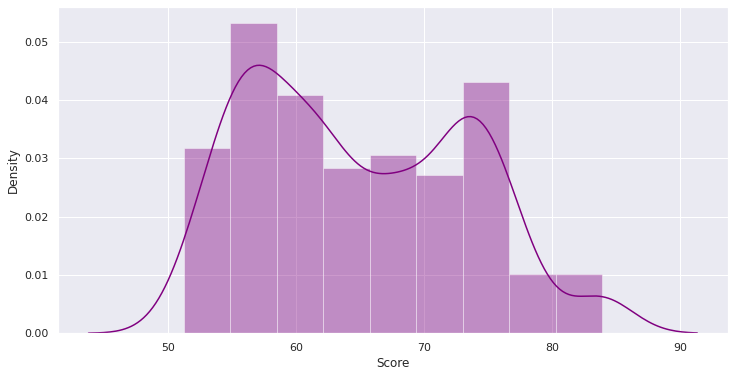

In [ ]:
#Distribucion target
sns.distplot(df_final[target], color ='purple')
plt.show()

In [ ]:
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    lista_categoricas_2_bool=[]
    
    for i in dataset:
        if    (dataset[i].dtype=="float64" or dataset[i].dtype=="int64") and len(dataset[i].value_counts())!= 2  and i not in target:
              lista_numericas.append(i)
        if  (dataset[i].dtype=="float64" or dataset[i].dtype=="int64" or dataset[i].dtype=="bool") and len(dataset[i].value_counts())== 2  and i not in target:
              lista_boolean.append(i)
        if  (dataset[i].dtype=="object")  and len(dataset[i].value_counts())!= 2 and i not in target:
              lista_categoricas.append(i)
        if  (dataset[i].dtype=="object") and len(dataset[i].value_counts())== 2 and i not in target:
              lista_categoricas_2_bool.append(i)
                
    return lista_numericas, lista_boolean, lista_categoricas, lista_categoricas_2_bool

In [ ]:
lista_numericas, lista_boolean, lista_categoricas, lista_categoricas_2_bool = obtener_lista_variables(df_final)

In [ ]:
lista_numericas

['fulltime_employement_rate',
 'duration_working_life',
 'employed_in_education_health_socialactivities',
 'flexibility_at_work',
 'career_prospects',
 'mean_monthly_earnings',
 'mean_equivalised_income',
 'risk_of_poverty',
 'S20/S80_income',
 'tertiary_education_graduates',
 'people_in_education',
 'tertiary_students_education_health_art_field',
 'caring_kids_eldery_people_everyday',
 'cooking_housework_everyday',
 'doing_sport_cultural_activities',
 'voluntary_activities',
 'share_ministers',
 'share_members_parliament',
 'share_members_regional_assemblies',
 'share_board_members_largest_companies',
 'share_board_members_central_bank',
 'share_board_member_research_org',
 'share_board_member_public_org',
 'share_decision_making_body_olympic_org',
 'good_self-perceived_health',
 'life_expectancy',
 'healthy_life_years',
 'no_smoking_nor_harmful_drinking',
 'doing_sport_eating_healthy',
 'no_medical_examination',
 'no_dental_examination',
 'year']

In [ ]:
lista_categoricas_2_bool

['Sex']

In [ ]:
lista_categoricas

['Country']

# 3. Correlaciones

In [ ]:
corr = df_final.corr()
corr.style.background_gradient(cmap='coolwarm')

,fulltime_employement_rate,duration_working_life,employed_in_education_health_socialactivities,flexibility_at_work,career_prospects,mean_monthly_earnings,mean_equivalised_income,risk_of_poverty,S20/S80_income,tertiary_education_graduates,people_in_education,tertiary_students_education_health_art_field,caring_kids_eldery_people_everyday,cooking_housework_everyday,doing_sport_cultural_activities,voluntary_activities,share_ministers,share_members_parliament,share_members_regional_assemblies,share_board_members_largest_companies,share_board_members_central_bank,share_board_member_research_org,share_board_member_public_org,share_decision_making_body_olympic_org,good_self-perceived_health,life_expectancy,healthy_life_years,no_smoking_nor_harmful_drinking,doing_sport_eating_healthy,no_medical_examination,no_dental_examination,year,Score
fulltime_employement_rate,1.000000,0.775399,-0.680034,0.147329,0.280589,0.199622,0.110527,-0.235130,0.091125,0.065863,0.144508,-0.664067,-0.657343,-0.708042,0.192293,0.128449,0.738442,0.767405,0.765690,0.791709,0.777819,0.577556,0.675396,0.800602,0.139178,-0.595718,-0.105118,-0.683574,0.312301,-0.060303,-0.073452,0.132897,0.065147
duration_working_life,0.775399,1.000000,-0.352159,0.430588,0.200817,0.419460,0.325837,-0.226208,0.124948,0.317373,0.455377,-0.388709,-0.613092,-0.429189,0.484756,0.379644,0.586622,0.600601,0.598051,0.607736,0.588784,0.416428,0.521820,0.603210,0.223162,-0.223827,-0.055107,-0.483292,0.541801,-0.170577,-0.094302,0.183773,0.400095
employed_in_education_health_socialactivities,-0.680034,-0.352159,1.000000,0.024125,0.116829,0.048102,0.202363,0.015796,0.208326,0.382706,0.412788,0.942141,0.566289,0.852018,0.193683,0.233927,-0.724609,-0.766562,-0.757756,-0.819853,-0.800568,-0.579004,-0.657338,-0.836323,-0.084834,0.757172,0.164366,0.714435,0.167965,-0.032449,-0.096821,0.016231,0.330353
flexibility_at_work,0.147329,0.430588,0.024125,1.000000,0.278607,0.566813,0.472243,-0.176612,0.165114,0.265280,0.479081,0.015289,-0.143429,0.042590,0.683694,0.581633,0.119048,0.144140,0.144417,0.178867,0.165411,0.071830,0.102768,0.177683,0.449055,0.141351,0.239766,-0.225878,0.510233,-0.327149,-0.193578,0.000000,0.722833
career_prospects,0.280589,0.200817,0.116829,0.278607,1.000000,0.285338,0.291918,-0.264370,0.297471,0.199888,0.413811,0.101647,-0.185611,0.035271,0.345437,0.380500,0.038063,0.037568,0.045331,0.047638,0.069994,0.015426,0.051108,0.061094,0.070998,-0.124625,-0.026442,-0.325771,0.450850,-0.054500,-0.323193,0.000000,0.418655
mean_monthly_earnings,0.199622,0.419460,0.048102,0.566813,0.285338,1.000000,0.896166,-0.367057,0.296462,0.418740,0.514311,0.071059,-0.219597,-0.033880,0.688840,0.594735,0.192533,0.207790,0.205395,0.229027,0.228101,0.169666,0.184889,0.232599,0.652869,0.357749,0.368224,-0.295737,0.704154,-0.462923,-0.406780,0.119864,0.732277
mean_equivalised_income,0.110527,0.325837,0.202363,0.472243,0.291918,0.896166,1.000000,-0.356773,0.318400,0.498354,0.552449,0.216778,-0.049904,0.117341,0.644798,0.569997,0.041557,0.045937,0.045529,0.049800,0.050484,0.031044,0.038106,0.050605,0.542149,0.492060,0.326648,-0.125159,0.704501,-0.531318,-0.450754,0.177007,0.724765
risk_of_poverty,-0.235130,-0.226208,0.015796,-0.176612,-0.264370,-0.367057,-0.356773,1.000000,-0.850795,0.019805,-0.333697,-0.002482,0.247837,0.187713,-0.363507,-0.426117,-0.129327,-0.158173,-0.154246,-0.165173,-0.151792,-0.129271,-0.107671,-0.167235,-0.304736,-0.063101,-0.040759,0.146867,-0.463325,0.320441,0.354803,0.147937,-0.277750
S20/S80_income,0.091125,0.124948,0.208326,0.165114,0.297471,0.296462,0.318400,-0.850795,1.000000,0.116445,0.360794,0.234445,-0.072598,0.043007,0.366160,0.452266,-0.078020,-0.072753,-0.071612,-0.068077,-0.076067,-0.046105,-0.070957,-0.072054,0.227609,0.255257,0.031914,0.079923,0.430976,-0.264838,-0.406038,-0.021538,0.277765
tertiary_education_graduates,0.065863,0.317373,0.382706,0.265280,0.199888,0.418740,0.498354,0.019805,0.116445,1.000000,0.525672,0.328496,0.253071,0.382302,0.518515,0.293832,-0.176909,-

In [ ]:
def correlation(dataset, threshold):
    col_corr = list() # Set of all the names of deleted columns
    colnames = list()
    rownames = list()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Y = pd.DataFrame({'F1':colnames,
                      'F2':rownames,
                      'corr':col_corr})
    return Y

In [ ]:
highly_corr = correlation(df_final, 0.85)
highly_corr

,F1,F2,corr
0,mean_equivalised_income,mean_monthly_earnings,0.896166
1,tertiary_students_education_health_art_field,employed_in_education_health_socialactivities,0.942141
2,cooking_housework_everyday,employed_in_education_health_socialactivities,0.852018
3,share_members_parliament,share_ministers,0.947487
4,share_members_regional_assemblies,share_ministers,0.951260
5,share_members_regional_assemblies,share_members_parliament,0.967247
6,share_board_members_largest_companies,share_ministers,0.925656
7,share_board_members_largest_companies,share_members_parliament,0.953952
8,share_board_members_largest_companies,share_members_regional_assemblies,0.937513
9,share_board_members_central_bank,share_ministers,0.895340


# 4. Encoding

Para las variables categoricas aplicamos el One- Hot y para las variables booleanas aplicamos el Label Encoder

In [ ]:
le=LabelEncoder()

In [ ]:
for i in lista_categoricas_2_bool:
	df_final[i]=le.fit_transform(df_final[i])

In [ ]:
df_final = pd.get_dummies(data=df_final,prefix=None,prefix_sep="_",columns=lista_categoricas,drop_first="True")

In [ ]:
df_final

,fulltime_employement_rate,duration_working_life,employed_in_education_health_socialactivities,flexibility_at_work,career_prospects,mean_monthly_earnings,mean_equivalised_income,risk_of_poverty,S20/S80_income,tertiary_education_graduates,...,Country_Luxembourg,Country_Malta,Country_Netherlands,Country_Poland,Country_Portugal,Country_Romania,Country_Slovakia,Country_Slovenia,Country_Spain,Country_Sweden
0,42.0,35.0,28.0,36.0,64.0,2343.0,26442.0,14.0,24.0,26.0,...,0,0,0,0,0,0,0,0,0,0
1,40.0,32.0,39.0,30.0,66.0,2778.0,23204.0,15.0,28.0,34.0,...,0,0,0,0,0,0,0,0,0,0
2,47.0,32.0,19.0,20.0,66.0,1078.0,10612.0,24.0,13.0,26.0,...,0,0,0,0,0,0,0,0,0,0
3,49.0,34.0,19.0,17.0,53.0,1941.0,21910.0,15.0,21.0,39.0,...,0,0,0,0,0,0,0,0,0,0
4,49.0,33.0,25.0,11.0,61.0,1463.0,15050.0,12.0,30.0,20.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,54.5,38.5,7.0,28.0,57.0,1670.0,12984.0,18.0,16.5,14.5,...,0,0,0,0,1,0,0,0,0,0
482,59.0,36.0,3.0,20.0,67.0,1003.0,5732.0,22.0,13.5,13.0,...,0,0,0,0,0,1,0,0,0,0
483,65.5,42.5,12.0,47.0,68.0,3085.0,23088.5,14.5,24.5,28.5,...,0,0,0,0,0,0,0,0,0,1
484,57.0,36.5,6.0,32.0,61.0,2021.0,16596.0,12.5,28.5,21.5,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_f=df_final.copy()

# 5. Split, Train and Test

Eliminamos la variable año ya que no queremos que afecte al modelo

In [ ]:
#del df_f['year']

## 5.1. Benchmark

Punto de partida: probamos de hacer el modelo con solo las variables numéricas (excluyendo el país), para analizar los resultados de partida para mejorar

In [ ]:
df_num = df_f.select_dtypes(include = ['int64', 'float64'])
df_num.head()

,fulltime_employement_rate,duration_working_life,employed_in_education_health_socialactivities,flexibility_at_work,career_prospects,mean_monthly_earnings,mean_equivalised_income,risk_of_poverty,S20/S80_income,tertiary_education_graduates,...,good_self-perceived_health,life_expectancy,healthy_life_years,no_smoking_nor_harmful_drinking,doing_sport_eating_healthy,no_medical_examination,no_dental_examination,year,Sex,Score
0,42.0,35.0,28.0,36.0,64.0,2343.0,26442.0,14.0,24.0,26.0,...,71.0,84.0,58.0,65.0,51.0,1.0,1.0,2021,1,68.0
1,40.0,32.0,39.0,30.0,66.0,2778.0,23204.0,15.0,28.0,34.0,...,72.0,84.0,63.0,68.0,29.0,3.0,5.0,2021,1,72.7
2,47.0,32.0,19.0,20.0,66.0,1078.0,10612.0,24.0,13.0,26.0,...,63.0,79.0,68.0,68.0,9.0,2.0,3.0,2021,1,59.9
3,49.0,34.0,19.0,17.0,53.0,1941.0,21910.0,15.0,21.0,39.0,...,77.0,84.0,63.0,81.0,33.0,2.0,5.0,2021,1,57.0
4,49.0,33.0,25.0,11.0,61.0,1463.0,15050.0,12.0,30.0,20.0,...,61.0,82.0,63.0,73.0,30.0,3.0,3.0,2021,1,56.7


In [ ]:
df_num.head(1)

,fulltime_employement_rate,duration_working_life,employed_in_education_health_socialactivities,flexibility_at_work,career_prospects,mean_monthly_earnings,mean_equivalised_income,risk_of_poverty,S20/S80_income,tertiary_education_graduates,...,good_self-perceived_health,life_expectancy,healthy_life_years,no_smoking_nor_harmful_drinking,doing_sport_eating_healthy,no_medical_examination,no_dental_examination,year,Sex,Score
0,42.0,35.0,28.0,36.0,64.0,2343.0,26442.0,14.0,24.0,26.0,...,71.0,84.0,58.0,65.0,51.0,1.0,1.0,2021,1,68.0


In [ ]:
target="Score"
features_num = df_num.columns[df_num.columns!=target]

In [ ]:
y = df_num[target]
X = df_num[features_num]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print('Train set size:',X_train.shape[0])
print('Test set size:',X_test.shape[0])

Train set size: 340
Test set size: 146


In [ ]:
MAE= []
MSE =[]
RMSE= []
R2_SQUARE = []



Estandarización

In [ ]:
# Estandarización:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Modelo: Regresión Lineal

In [ ]:
lin_reg1 = LinearRegression()
lin_reg1.fit(X_train,y_train)

LinearRegression()

In [ ]:
lin_reg1.intercept_

64.84867647058822

Evalucación del modelo

In [ ]:
y_pred = lin_reg1.predict(X_test)

In [ ]:
MAE.append(round(metrics.mean_absolute_error(y_test, y_pred),5))
MSE.append(round(metrics.mean_squared_error(y_test, y_pred),5))
RMSE.append(round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),5))
R2_SQUARE.append(round(metrics.r2_score(y_test, y_pred),5))


In [ ]:
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [ ]:
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

In [ ]:
results_df = pd.DataFrame(data=[["Linear Regression_inicial", *evaluate(y_test, y_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2_SQUARE', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2_SQUARE,Cross Validation
0,Linear Regression_inicial,2.339407,8.836586,2.97264,0.876986,0.895272


## 5.2. Regresión Lineal

In [ ]:
target="Score"
features = df_f.columns[df_f.columns!=target]

In [ ]:
y = df_f[target]
X = df_f[features]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print('Train set size:',X_train.shape[0])
print('Test set size:',X_test.shape[0])

Train set size: 340
Test set size: 146


Estandarización

In [ ]:
# Estandarización:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Modelado

In [ ]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_train,y_train)

LinearRegression()

In [ ]:
lin_reg2.intercept_

64.84867647058823

Evaluación del modelo

In [ ]:
y_pred = lin_reg2.predict(X_test)

In [ ]:
MAE.append(round(metrics.mean_absolute_error(y_test, y_pred),5))
MSE.append(round(metrics.mean_squared_error(y_test, y_pred),5))
RMSE.append(round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),5))
R2_SQUARE.append(round(metrics.r2_score(y_test, y_pred),5))


In [ ]:
results_df_2 = pd.DataFrame(data=[["Linear Regression Final", *evaluate(y_test, y_pred) , cross_val(LinearRegression())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2_SQUARE', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2_SQUARE,Cross Validation
0,Linear Regression_inicial,2.339407,8.836586,2.972640,0.876986,0.895272
1,Linear Regression Final,0.564768,0.615009,0.784225,0.991438,0.991755


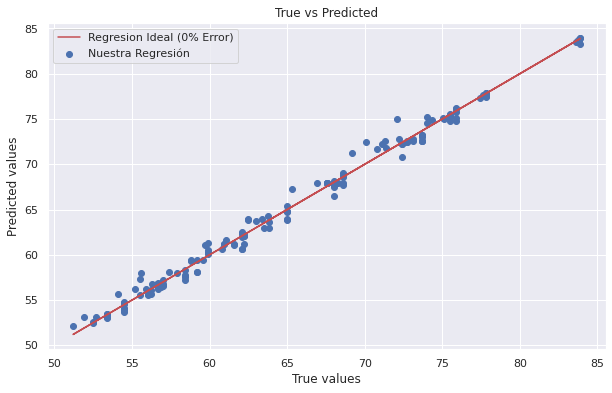

In [ ]:
#Compara Prediccion vs dato real
plt.figure(figsize=[10,6])
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,'r')
plt.title('True vs Predicted')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.legend(['Regresion Ideal (0% Error)','Nuestra Regresión'])
plt.show()

In [ ]:
error = y_pred - y_test.values

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


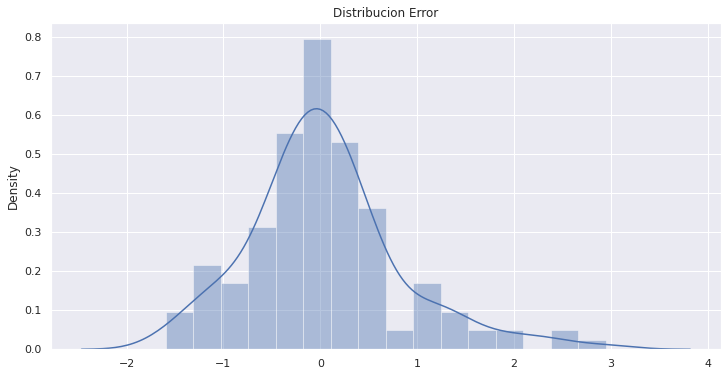

In [ ]:
sns.set(rc={'figure.figsize':(12,6)})
sns.distplot(error).set_title('Distribucion Error')
plt.show()

### Conclusión 1

Observamos que ha habido una mejora del modelo cuando utilizamos todas las varibales. Es decir, que introducimos la variable "Country". Vemos que esta incfluencia los resultados notablemente.

Aun así, aplicamos otros modelos para intentar mejorar dichos resultados.

## 5.3. Lasso

In [ ]:
target="Score"
features = df_f.columns[df_f.columns!=target]

y = df_f[target]
X = df_f[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Estandarización:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Modelado

In [ ]:
model_lasso = Lasso(alpha=0.0001)
model_lasso.fit(X_train, y_train)

test_pred = model_lasso.predict(X_test)
train_pred = model_lasso.predict(X_train)

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.445e+01, tolerance: 2.477e+00


Evaluación del modelo

In [ ]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2_SQUARE', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2_SQUARE,Cross Validation
0,Linear Regression_inicial,2.339407,8.836586,2.972640,0.876986,0.895272
1,Linear Regression Final,0.564768,0.615009,0.784225,0.991438,0.991755
2,Lasso Regression,0.567146,0.617070,0.785538,0.991410,0.884231


### Conclusión 2

Observamos que se ha conseguido mejorar el modelo, ya que el RMSE, que es la principal métrica en la que ponemos foco, no se ha reducido.

## 5.4. Ridge

In [ ]:
target="Score"
features = df_f.columns[df_f.columns!=target]

y = df_f[target]
X = df_f[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Estandarización:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Modelado

In [ ]:
model_ridge = Ridge(alpha=0.01)
model_ridge.fit(X_train, y_train)
pred = model_ridge.predict(X_test)

test_pred = model_ridge.predict(X_test)
train_pred = model_ridge.predict(X_train)

Evaluación del modelo

In [ ]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2_SQUARE', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2_SQUARE,Cross Validation
0,Linear Regression_inicial,2.339407,8.836586,2.972640,0.876986,0.895272
1,Linear Regression Final,0.564768,0.615009,0.784225,0.991438,0.991755
2,Lasso Regression,0.567146,0.617070,0.785538,0.991410,0.884231
3,Ridge Regression,0.564406,0.614546,0.783930,0.991445,0.987282


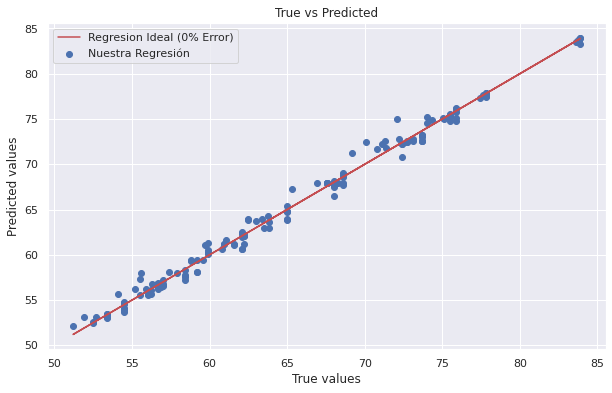

In [ ]:
plt.figure(figsize=[10,6])
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,'r')
plt.title('True vs Predicted')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.legend(['Regresion Ideal (0% Error)','Nuestra Regresión'])
plt.show()

In [ ]:
error = y_pred - y_test.values

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


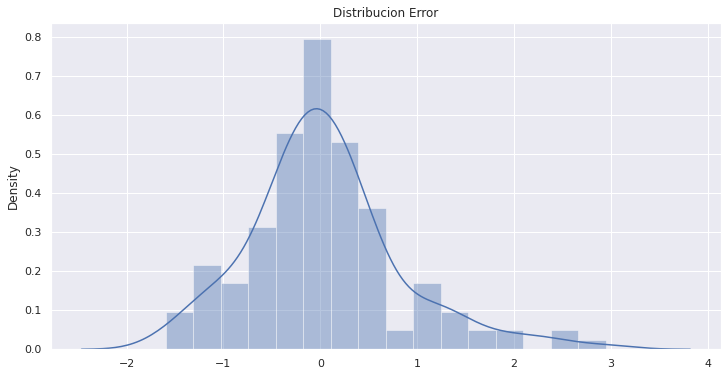

In [ ]:
sns.set(rc={'figure.figsize':(12,6)})
sns.distplot(error).set_title('Distribucion Error')
plt.show()

### Conclusión 3

Con Ridge Regression hemos conseguido bajar el RMSE muy poco, respecto la Regresión Lineal

## 5.5. ElasticNet

In [ ]:
target="Score"
features = df_f.columns[df_f.columns!=target]

y = df_f[target]
X = df_f[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Estandarización:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Modelado

In [ ]:
model_elasticnet = ElasticNet(alpha=0.001, l1_ratio=1, selection='random', random_state=42) 
model_elasticnet.fit(X_train, y_train)

test_pred = model_elasticnet.predict(X_test)
train_pred = model_elasticnet.predict(X_train)

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.871e+01, tolerance: 2.477e+00


Evaluación del modelo

In [ ]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2_SQUARE', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2_SQUARE,Cross Validation
0,Linear Regression_inicial,2.339407,8.836586,2.972640,0.876986,0.895272
1,Linear Regression Final,0.564768,0.615009,0.784225,0.991438,0.991755
2,Lasso Regression,0.567146,0.617070,0.785538,0.991410,0.884231
3,Ridge Regression,0.564406,0.614546,0.783930,0.991445,0.987282
4,Elastic Net Regression,0.574508,0.631799,0.794858,0.991205,0.892222


### Conclusión 4

Seguimos manetiendo más o menos los mismos resultados. Probamos con árboles de decisión.

## 5.6. XGBoost

In [ ]:
target="Score"
features = df_f.columns[df_f.columns!=target]

y = df_f[target]
X = df_f[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Modelado

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 4, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train,y_train)

test_pred = xg_reg.predict(X_test)
train_pred = xg_reg.predict(X_train)

Evaluación del modelo

In [ ]:
results_df_2 = pd.DataFrame(data=[["XGBRegressor", *evaluate(y_test, y_pred) , cross_val(LinearRegression())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2_SQUARE', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2_SQUARE,Cross Validation
0,Linear Regression_inicial,2.339407,8.836586,2.972640,0.876986,0.895272
1,Linear Regression Final,0.564768,0.615009,0.784225,0.991438,0.991755
2,Lasso Regression,0.567146,0.617070,0.785538,0.991410,0.884231
3,Ridge Regression,0.564406,0.614546,0.783930,0.991445,0.987282
4,Elastic Net Regression,0.574508,0.631799,0.794858,0.991205,0.892222
5,XGBRegressor,0.564768,0.615009,0.784225,0.991438,0.991755


In [ ]:
y_pred_train = xg_reg.predict(X_train)
rmse_train = np.sqrt(np.mean((y_pred_train - y_train) ** 2))

y_pred_test = xg_reg.predict(X_test)
rmse_test = np.sqrt(np.mean((y_pred_test - y_test) ** 2))

print("Training RMSE: %.5f" %rmse_train)
print("Test RMSE: %.5f" %rmse_test)

Training RMSE: 23.13385
Test RMSE: 23.28306


### Conclusión 5

No conseguimos mejorar el modelo con el XGBoost. Hiperparametrizamos para intentar mejorarlo.

## 5.7. XGBoost 2

In [ ]:
target="Score"
features = df_f.columns[df_f.columns!=target]

y = df_f[target]
X = df_f[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
xg_reg2 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.6, learning_rate = 1,
                max_depth = 4, alpha = 10, n_estimators = 10)

xg_reg2.fit(X_train,y_train)

test_pred = xg_reg2.predict(X_test)
train_pred = xg_reg2.predict(X_train)

In [ ]:
results_df_2 = pd.DataFrame(data=[["XGBRegressor2", *evaluate(y_test, y_pred) , cross_val(LinearRegression())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2_SQUARE', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2_SQUARE,Cross Validation
0,Linear Regression_inicial,2.339407,8.836586,2.972640,0.876986,0.895272
1,Linear Regression Final,0.564768,0.615009,0.784225,0.991438,0.991755
2,Lasso Regression,0.567146,0.617070,0.785538,0.991410,0.884231
3,Ridge Regression,0.564406,0.614546,0.783930,0.991445,0.987282
4,Elastic Net Regression,0.574508,0.631799,0.794858,0.991205,0.892222
5,XGBRegressor,0.564768,0.615009,0.784225,0.991438,0.991755
6,XGBRegressor2,0.564768,0.615009,0.784225,0.991438,0.991755


In [ ]:
y_pred_train = xg_reg2.predict(X_train)
rmse_train = np.sqrt(np.mean((y_pred_train - y_train) ** 2))

y_pred_test = xg_reg2.predict(X_test)
rmse_test = np.sqrt(np.mean((y_pred_test - y_test) ** 2))

print("Training RMSE: %.5f" %rmse_train)
print("Test RMSE: %.5f" %rmse_test)

Training RMSE: 0.46011
Test RMSE: 1.56827


# Cálculo de los pesos de las variables

Cogemos el modelo con un menor RMSE, el Ridge Regression y calculamos los pesos de cada variable para determinar la fórmula del índice de igualdad en la EU.

In [ ]:
coeff_Ridge_Regression = pd.DataFrame(data=model_ridge.coef_, index = X.columns.values, columns=['Coefficient']).sort_values(by='Coefficient', ascending = False)
coeff_Ridge_Regression

,Coefficient
Country_Sweden,2.763476
Country_Denmark,1.656976
Country_Finland,1.599651
Country_Netherlands,1.412400
Country_France,1.376808
Country_Spain,1.029441
Country_Ireland,0.884354
Country_Belgium,0.795712
Country_Luxembourg,0.774040
tertiary_students_education_health_art_field,0.604438


Observamos que el país tiene una importancia relevante en el cálculo del ínidice de igualdad de género. Vemos que los países con una mayor igualdad, tienen un peso mayor. Esto tiene sentido, ya que no son solo las variables que se estudian en este dataset las que determinan esta igualdad (son las que afectan directamente), si no que otros factores relacionados con el estado de bienestar de cada país que afectan de una manera indirecta a este cálculo.

# Importancia de las variables

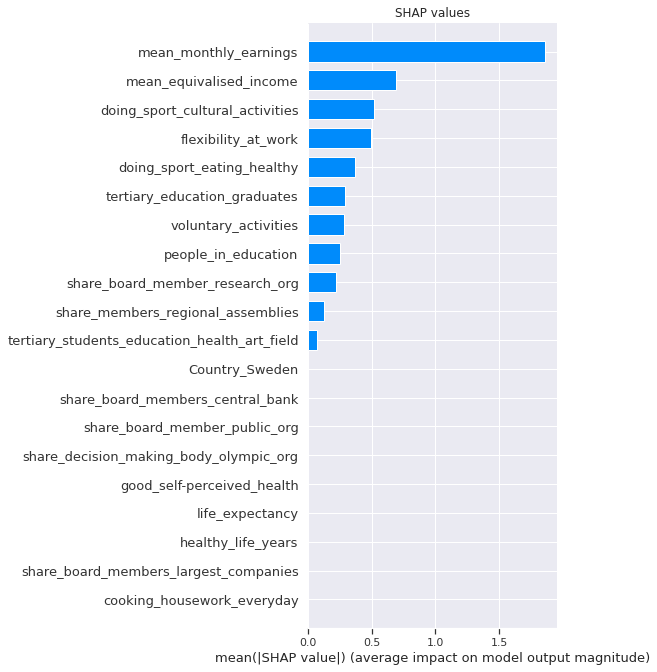

In [ ]:
explainer = shap.TreeExplainer(xg_reg)
shap_values = explainer.shap_values(X_test)
plt.title('SHAP values')
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=20)

# CONCLUSIONES

In [ ]:
Mean_=df_f["Score"].mean()

In [ ]:
RMSE= 0.783930

In [ ]:
Relación= RMSE/Mean_
Relación

0.012073494338618136

observamos que el modelo segun el valor que nos da de RMSE nos indica que es un modelo fiable para utilizar. 
A continuación se puede ver los valores de los pesos de cada variable para el cálculo del Score.